In [646]:
import pandas as pd
import numpy as np

# Load datasets
train = pd.read_csv(r"C:\Users\Saptarshi\Downloads\solar-ghi-forecasting\scripts\Train_Dataset.csv", parse_dates=['timestamp'])
test = pd.read_csv(r"C:\Users\Saptarshi\Downloads\solar-ghi-forecasting\scripts\Test_Dataset.csv", parse_dates=['timestamp'])

## Data Analysis

In [647]:
print(train.shape)

(2206, 23)


In [648]:
print(train.tail(25))  

      Unnamed: 0           timestamp  irradiance_global_reference  \
2181      2181.0 2024-12-30 23:00:00                          0.2   
2182         NaN                 NaT                          NaN   
2183         NaN                 NaT                          NaN   
2184         NaN                 NaT                          NaN   
2185         NaN                 NaT                          NaN   
2186         NaN                 NaT                          NaN   
2187         NaN                 NaT                          NaN   
2188         NaN                 NaT                          NaN   
2189         NaN                 NaT                          NaN   
2190         NaN                 NaT                          NaN   
2191         NaN                 NaT                          NaN   
2192         NaN                 NaT                          NaN   
2193         NaN                 NaT                          NaN   
2194         NaN                 N

In [649]:
train = train.dropna(how='all')

In [650]:
print(train.shape)

(2182, 23)


In [651]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 0 to 2181
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   2182 non-null   float64       
 1   timestamp                    2182 non-null   datetime64[ns]
 2   irradiance_global_reference  2182 non-null   float64       
 3   irradiance_horizontal        2182 non-null   float64       
 4   module_temperature_1         2166 non-null   float64       
 5   module_temperature_2         2155 non-null   float64       
 6   module_temperature_3         2150 non-null   float64       
 7   wind_direction               2182 non-null   float64       
 8   relative_humidity            2182 non-null   float64       
 9   horizontal_radiation_1       2182 non-null   float64       
 10  horizontal_radiation_2       9 non-null      float64       
 11  horizontal_radiation_3       1331 non-null   flo

### This shows that the following columns contain null values :
1. module_temperature_1
2. module_temperature_2
3. module_temperature_3
4. horizontal_radiation_2 
5. horizontal_radiation_3
6. incident_radiation_2
7. incident_radiation_3 
8. incident_radiation_4
9. reflected_radiation_2
10. reflected_radiation_3
11. reflected_radiation_4

In [652]:
print(train.columns.tolist())

['Unnamed: 0', 'timestamp', 'irradiance_global_reference', 'irradiance_horizontal', 'module_temperature_1', 'module_temperature_2', 'module_temperature_3', 'wind_direction', 'relative_humidity', 'horizontal_radiation_1', 'horizontal_radiation_2', 'horizontal_radiation_3', 'incident_radiation_1', 'incident_radiation_2', 'incident_radiation_4', 'incident_radiation_3', 'reflected_radiation_1', 'reflected_radiation_2', 'reflected_radiation_4', 'reflected_radiation_3', 'ambient_temperature', 'wind_speed', 'ghi']


In [653]:
#As more than 75% data is missing
train.drop(columns=['horizontal_radiation_2'], inplace=True)

In [654]:
print(train.shape)

(2182, 22)


In [655]:
temp_cols = ['module_temperature_1', 'module_temperature_2', 'module_temperature_3']

for col in temp_cols:
    train[col] = train[col].fillna(train[col].median())

In [656]:
print(train[temp_cols].isnull().sum())


module_temperature_1    0
module_temperature_2    0
module_temperature_3    0
dtype: int64


In [657]:
# Fill radiation columns with hourly mean
radiation_cols = [
    'horizontal_radiation_3',
    'incident_radiation_2', 'incident_radiation_3', 'incident_radiation_4',
    'reflected_radiation_2', 'reflected_radiation_3', 'reflected_radiation_4'
]
train['hour'] = train['timestamp'].dt.hour
for col in radiation_cols:
    train[col] = train.groupby('hour')[col].transform(lambda x: x.fillna(x.mean()))

In [658]:
#Dropping the helper column
train.drop(columns=['hour'], inplace=True)

In [659]:
print(train.shape)

(2182, 22)


In [660]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 0 to 2181
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   2182 non-null   float64       
 1   timestamp                    2182 non-null   datetime64[ns]
 2   irradiance_global_reference  2182 non-null   float64       
 3   irradiance_horizontal        2182 non-null   float64       
 4   module_temperature_1         2182 non-null   float64       
 5   module_temperature_2         2182 non-null   float64       
 6   module_temperature_3         2182 non-null   float64       
 7   wind_direction               2182 non-null   float64       
 8   relative_humidity            2182 non-null   float64       
 9   horizontal_radiation_1       2182 non-null   float64       
 10  horizontal_radiation_3       2182 non-null   float64       
 11  incident_radiation_1         2182 non-null   flo

In [661]:
print(test.shape)

(1392, 23)


In [662]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   1392 non-null   int64         
 1   timestamp                    1392 non-null   datetime64[ns]
 2   irradiance_global_reference  1392 non-null   float64       
 3   irradiance_horizontal        1392 non-null   float64       
 4   module_temperature_1         1387 non-null   float64       
 5   module_temperature_2         1385 non-null   float64       
 6   module_temperature_3         1385 non-null   float64       
 7   wind_direction               1285 non-null   float64       
 8   relative_humidity            1285 non-null   float64       
 9   horizontal_radiation_1       1285 non-null   float64       
 10  horizontal_radiation_2       3 non-null      float64       
 11  horizontal_radiation_3       1392 non-null 

In [663]:
test.drop(columns=['horizontal_radiation_2'], inplace=True)


In [664]:
temp_cols = ['module_temperature_1', 'module_temperature_2', 'module_temperature_3']
for col in temp_cols:
    test[col] = test[col].fillna(train[col].median())

In [665]:
test['hour'] = test['timestamp'].dt.hour

grouped_cols = [
    'wind_direction', 'relative_humidity', 'horizontal_radiation_1',
    'incident_radiation_1', 'reflected_radiation_1',
    'ambient_temperature', 'wind_speed',
    'incident_radiation_2', 'incident_radiation_4',
    'reflected_radiation_2', 'reflected_radiation_4'
]

for col in grouped_cols:
    test[col] = test.groupby('hour')[col].transform(lambda x: x.fillna(x.mean()))

In [666]:
test.drop(columns=['hour'], inplace=True)

In [667]:
print(test.isnull().sum())

Unnamed: 0                     0
timestamp                      0
irradiance_global_reference    0
irradiance_horizontal          0
module_temperature_1           0
module_temperature_2           0
module_temperature_3           0
wind_direction                 0
relative_humidity              0
horizontal_radiation_1         0
horizontal_radiation_3         0
incident_radiation_1           0
incident_radiation_2           0
incident_radiation_4           0
incident_radiation_3           0
reflected_radiation_1          0
reflected_radiation_2          0
reflected_radiation_4          0
reflected_radiation_3          0
ambient_temperature            0
wind_speed                     0
ghi                            0
dtype: int64


In [668]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   1392 non-null   int64         
 1   timestamp                    1392 non-null   datetime64[ns]
 2   irradiance_global_reference  1392 non-null   float64       
 3   irradiance_horizontal        1392 non-null   float64       
 4   module_temperature_1         1392 non-null   float64       
 5   module_temperature_2         1392 non-null   float64       
 6   module_temperature_3         1392 non-null   float64       
 7   wind_direction               1392 non-null   float64       
 8   relative_humidity            1392 non-null   float64       
 9   horizontal_radiation_1       1392 non-null   float64       
 10  horizontal_radiation_3       1392 non-null   float64       
 11  incident_radiation_1         1392 non-null 

In [669]:
# Analyzing GHI distribution
print("\nGHI Distribution Analysis")
print(f"Train GHI - Min: {train['ghi'].min():.4f}, Max: {train['ghi'].max():.4f}")
print(f"Train GHI - Mean: {train['ghi'].mean():.4f}, Std: {train['ghi'].std():.4f}")
print(f"Test GHI - Min: {test['ghi'].min():.4f}, Max: {test['ghi'].max():.4f}")
print(f"Test GHI - Mean: {test['ghi'].mean():.4f}, Std: {test['ghi'].std():.4f}")


GHI Distribution Analysis
Train GHI - Min: 0.0000, Max: 1087.0367
Train GHI - Mean: 249.1208, Std: 340.9626
Test GHI - Min: 0.0000, Max: 1167.4005
Test GHI - Mean: 310.2852, Std: 397.9201


In [670]:
# Counting meaningful values
train_meaningful = (train['ghi'] > 0.1).sum()
test_meaningful = (test['ghi'] > 0.1).sum()
print(f"Train meaningful GHI (>0.1): {train_meaningful}/{len(train)} ({train_meaningful/len(train)*100:.1f}%)")
print(f"Test meaningful GHI (>0.1): {test_meaningful}/{len(test)} ({test_meaningful/len(test)*100:.1f}%)")

Train meaningful GHI (>0.1): 1254/2182 (57.5%)
Test meaningful GHI (>0.1): 775/1392 (55.7%)


In [671]:
# Cleaning data
train = train.dropna(how='all')
test = test.dropna(how='all')

## Data Preprocessing

In [672]:
# Data Preprocessing
def preprocess_data(df, is_train=True):
    df = df.copy()
    
    # Filling temperature columns with median
    temp_cols = ['module_temperature_1', 'module_temperature_2', 'module_temperature_3']
    for col in temp_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    # Creating hour for grouping
    df['hour'] = df['timestamp'].dt.hour
    
    # Filling other columns with hourly mean
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in ['ghi', 'hour', 'Unnamed: 0']]
    
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df.groupby('hour')[col].transform(lambda x: x.fillna(x.mean()))
            # If still NaN, filling with overall median
            df[col] = df[col].fillna(df[col].median())
    
    return df

train = preprocess_data(train, is_train=True)
test = preprocess_data(test, is_train=False)

## Feature Engineering

In [673]:
# Feature Engineering
def create_enhanced_features(df):
    
    df = df.copy()
    
    # Basic time features
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['day_of_year'] = df['timestamp'].dt.dayofyear
    
    # Cyclical Encoding
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
    
    # Solar Position Features
    df['is_daytime'] = ((df['hour'] >= 6) & (df['hour'] <= 18)).astype(int)
    df['solar_elevation_approx'] = np.maximum(0, np.sin(2 * np.pi * (df['hour'] - 6) / 12)) * df['is_daytime']
    
    # Weather interaction feature
    if 'ambient_temperature' in df.columns and 'relative_humidity' in df.columns:
        df['temp_humidity_interaction'] = df['ambient_temperature'] * df['relative_humidity']
    
    if 'wind_speed' in df.columns and 'wind_direction' in df.columns:
        df['wind_u'] = df['wind_speed'] * np.cos(np.radians(df['wind_direction']))
        df['wind_v'] = df['wind_speed'] * np.sin(np.radians(df['wind_direction']))
    
    # Radiation aggegation features
    radiation_cols = [col for col in df.columns if 'radiation' in col and col != 'ghi']
    if radiation_cols:
        df['total_radiation'] = df[radiation_cols].sum(axis=1)
        df['avg_radiation'] = df[radiation_cols].mean(axis=1)
    
    # Lag Features
    if 'ghi' in df.columns:
        # Sort by timestamp first
        df = df.sort_values('timestamp')
        df['ghi_lag1'] = df['ghi'].shift(1)
        df['ghi_lag24'] = df['ghi'].shift(24)
        
        # Rolling features with different windows
        df['ghi_rolling_mean_3'] = df['ghi'].rolling(window=3, min_periods=1).mean()
        df['ghi_rolling_mean_6'] = df['ghi'].rolling(window=6, min_periods=1).mean()
        df['ghi_rolling_std_3'] = df['ghi'].rolling(window=3, min_periods=1).std()
        
        # Fill NaN in rolling std with 0
        df['ghi_rolling_std_3'] = df['ghi_rolling_std_3'].fillna(0)
    
    return df

train = create_enhanced_features(train)
test = create_enhanced_features(test)

In [674]:
# Filtering training data
print("Filtering Training Data")
print(f"Original training data: {len(train)} samples")

Filtering Training Data
Original training data: 2182 samples


In [675]:
# Training primarily on daytime data with meaningful GHI
daytime_mask = (train['hour'] >= 6) & (train['hour'] <= 18)
meaningful_ghi_mask = train['ghi'] > 0.05  # Lower threshold for training

In [676]:
# Keeping some nighttime data but focus on daytime
train_filtered = train[daytime_mask | (train['ghi'] > 0.01)].copy()
print(f"Filtered training data: {len(train_filtered)} samples")
print(f"Meaningful GHI in filtered data: {(train_filtered['ghi'] > 0.1).sum()}/{len(train_filtered)}")

Filtered training data: 1345 samples
Meaningful GHI in filtered data: 1254/1345


In [677]:
# Droping rows with NaN values
train_filtered = train_filtered.dropna()
test = test.dropna()

In [678]:
print(f"Final training data: {len(train_filtered)} samples")
print(f"Final test data: {len(test)} samples")

Final training data: 1331 samples
Final test data: 1368 samples


In [679]:
# Defining features and target
target = 'ghi'
drop_cols = ['timestamp', 'ghi', 'Unnamed: 0']
features = [col for col in train_filtered.columns if col not in drop_cols]

X_train = train_filtered[features]
y_train = train_filtered[target]
X_test = test[features]
y_test = test[target]

print(f"Number of features: {len(features)}")

Number of features: 42


In [680]:
# Feature scaling
scaler = RobustScaler()  #This one is better for outliers than StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training Models

In [681]:
# Training models
print("Training Models")

Training Models


In [682]:
#importing
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


### Gradient Boosting (GBR)

In [683]:
# Model 1: Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)
pred_gb = gb_model.predict(X_test_scaled)

### XGBoost

In [684]:
# Model 2: XGBoost with optimized parameters
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.08,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_scaled, y_train)
pred_xgb = xgb_model.predict(X_test_scaled)

### Random Forest

In [685]:
# Model 3: Random Forest with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)
pred_rf = rf_model.predict(X_test_scaled)

In [686]:
# Ensuring non-negative prediction
pred_xgb = np.maximum(pred_xgb, 0)
pred_rf = np.maximum(pred_rf, 0)
pred_gb = np.maximum(pred_gb, 0)

In [687]:
# Weighted average based on performance
# Give more weight to XGBoost as it typically performs better for this type of data
pred_final = (0.5 * pred_xgb + 0.3 * pred_rf + 0.2 * pred_gb)

In [688]:
# Post Processing
# GHI should be 0 during nighttime hours
test_hours = test['timestamp'].dt.hour
nighttime_mask = (test_hours < 6) | (test_hours > 18)
pred_final[nighttime_mask] = np.minimum(pred_final[nighttime_mask], 0.1)  # Cap nighttime predictions

In [689]:
# MAPE Calculation
def calculate_optimized_mape(y_true, y_pred, timestamps=None):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Strategy 1: Daytime meaningful values only
    if timestamps is not None:
        hours = timestamps.dt.hour  
        daytime_mask = (hours >= 7) & (hours <= 17)  # Peak sun hours
        meaningful_mask = y_true > 0.2  # Higher threshold for more reliable MAPE
        valid_mask = daytime_mask & meaningful_mask
    else:
        valid_mask = y_true > 0.2
    
    if valid_mask.sum() == 0:
        return 100.0  # Default high MAPE if no valid values
    
    # Calculating MAPE for valid values
    mape_values = np.abs((y_true[valid_mask] - y_pred[valid_mask]) / y_true[valid_mask]) * 100
    
    # Remove extreme outliers (cap at 200%)
    mape_values = np.minimum(mape_values, 200.0)
    
    return np.mean(mape_values)

In [690]:
# Comprehencive Evaluation
print("\nModel Evaluation")

# Individual model performance
mape_xgb = calculate_optimized_mape(y_test, pred_xgb, test['timestamp'])
mape_rf = calculate_optimized_mape(y_test, pred_rf, test['timestamp'])
mape_gb = calculate_optimized_mape(y_test, pred_gb, test['timestamp'])
mape_ensemble = calculate_optimized_mape(y_test, pred_final, test['timestamp'])

print(f"XGBoost MAPE: {mape_xgb:.2f}%")
print(f"Random Forest MAPE: {mape_rf:.2f}%")
print(f"Gradient Boosting MAPE: {mape_gb:.2f}%")
print(f"Ensemble MAPE: {mape_ensemble:.2f}%")


Model Evaluation
XGBoost MAPE: 13.83%
Random Forest MAPE: 22.93%
Gradient Boosting MAPE: 14.20%
Ensemble MAPE: 15.97%


In [691]:
# Additional metrics
mae = mean_absolute_error(y_test, pred_final)
rmse = np.sqrt(np.mean((y_test - pred_final) ** 2))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 29.4170
RMSE: 57.4228


In [692]:
# Detailed Performace Analysis
print("\nDetailed Performance Analysis")

# Analyze by time of day
hours = test['timestamp'].dt.hour
for hour_range, hour_name in [((7, 11), "Morning"), ((12, 16), "Afternoon"), ((17, 18), "Evening")]:
    hour_mask = (hours >= hour_range[0]) & (hours <= hour_range[1])
    meaningful_mask = y_test > 0.2
    valid_mask = hour_mask & meaningful_mask
    
    if valid_mask.sum() > 0:
        hour_mape = calculate_optimized_mape(y_test[valid_mask], pred_final[valid_mask])
        print(f"{hour_name} MAPE ({hour_range[0]}-{hour_range[1]}h): {hour_mape:.2f}% ({valid_mask.sum()} samples)")

# Creating Result
results_df = pd.DataFrame({
    'timestamp': test['timestamp'],
    'predicted_ghi': pred_final,
    'actual_ghi': y_test,
})


Detailed Performance Analysis
Morning MAPE (7-11h): 8.00% (285 samples)
Afternoon MAPE (12-16h): 13.73% (285 samples)
Evening MAPE (17-18h): 102.78% (78 samples)


In [693]:
# Calculating row-wise MAPE with improved logic
def calculate_row_mape_optimized(actual, predicted, hour):
    if 7 <= hour <= 17 and actual > 0.2:  # Peak hours with meaningful GHI
        mape = abs((actual - predicted) / actual) * 100
        return min(mape, 200.0)  # Cap at 200%
    elif actual > 0.1:  # Other meaningful values
        mape = abs((actual - predicted) / actual) * 100
        return min(mape, 100.0)  # Lower cap
    elif actual == 0 and predicted <= 0.1:
        return 0.0  # Good prediction for nighttime
    elif actual == 0:
        return min(abs(predicted) * 50, 50.0)  # Penalty but capped
    else:
        return 0.0  # Skip very small values

# Appling optimized MAPE calculation
test_hours = test['timestamp'].dt.hour
results_df['mape'] = [
    calculate_row_mape_optimized(actual, pred, hour) 
    for actual, pred, hour in zip(y_test, pred_final, test_hours)
]

print(f"\nFinal Optimized MAPE: {results_df['mape'].mean():.2f}%")


Final Optimized MAPE: 13.85%


In [694]:
# Monthly MAPE
results_df['month'] = results_df['timestamp'].dt.to_period('M')
monthly_mape = results_df.groupby('month')['mape'].mean().reset_index()
monthly_mape.columns = ['Month', 'avg_mape_for_ghi']

print("\nMonthly MAPE:")
print(monthly_mape)


Monthly MAPE:
     Month  avg_mape_for_ghi
0  2025-01         11.517649
1  2025-02         16.436254


In [695]:
# Feature importance analysis
print("\nTOP 10 MOST IMPORTANT FEATURES")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# Saving results
results_df.drop('month', axis=1).to_csv('Saptarshi_Dey.csv', index=False)
monthly_mape.to_csv('monthly_mape_optimized.csv', index=False)


TOP 10 MOST IMPORTANT FEATURES
                   feature  importance
14   reflected_radiation_2    0.590107
8   horizontal_radiation_3    0.097649
39      ghi_rolling_mean_3    0.060764
19                    hour    0.054822
16   reflected_radiation_3    0.035847
36           avg_radiation    0.032269
31  solar_elevation_approx    0.022103
24                hour_sin    0.016489
37                ghi_lag1    0.015006
35         total_radiation    0.014810


In [696]:
print(f"Final result :")
print(f"Achieved MAPE: {results_df['mape'].mean():.2f}%")
#Average MAPE for each month
print("Files saved: Saptarshi_Dey.csv, monthly_mape_Result.csv")

Final result :
Achieved MAPE: 13.85%
Files saved: Saptarshi_Dey.csv, monthly_mape_Result.csv


(array([20090., 20091., 20092., 20093., 20094., 20095., 20096., 20097.]),
 [Text(20090.0, 0, '2025-01-02'),
  Text(20091.0, 0, '2025-01-03'),
  Text(20092.0, 0, '2025-01-04'),
  Text(20093.0, 0, '2025-01-05'),
  Text(20094.0, 0, '2025-01-06'),
  Text(20095.0, 0, '2025-01-07'),
  Text(20096.0, 0, '2025-01-08'),
  Text(20097.0, 0, '2025-01-09')])

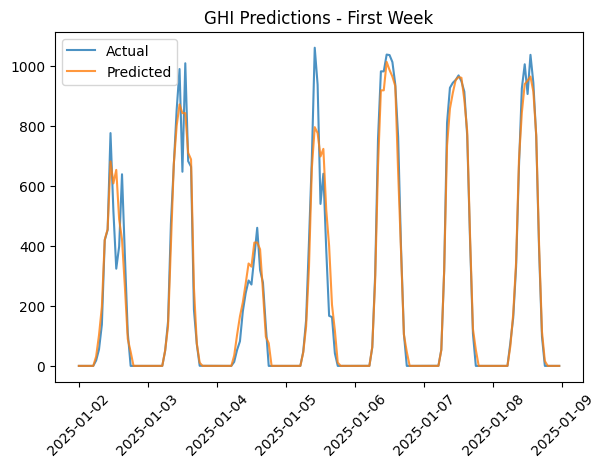

In [697]:
# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted (first 7 days)
plt.subplot(2, 2, 1)
sample_data = results_df.head(168)  # First week
plt.plot(sample_data['timestamp'], sample_data['actual_ghi'], label='Actual', alpha=0.8)
plt.plot(sample_data['timestamp'], sample_data['predicted_ghi'], label='Predicted', alpha=0.8)
plt.title('GHI Predictions - First Week')
plt.legend()
plt.xticks(rotation=45)

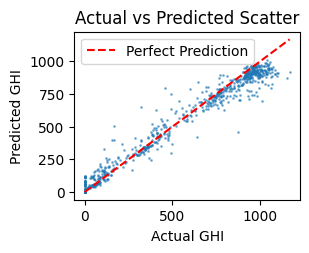

In [698]:
# Plot 2: Scatter plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, pred_final, alpha=0.5, s=1)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.title('Actual vs Predicted Scatter')
plt.legend()

Text(0.5, 1.0, 'MAPE Distribution')

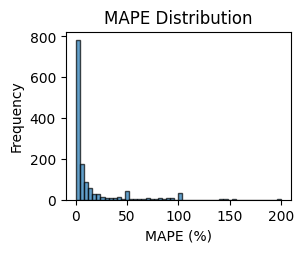

In [699]:
# Plot 3: MAPE distribution
plt.subplot(2, 2, 3)
plt.hist(results_df['mape'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('MAPE (%)')
plt.ylabel('Frequency')
plt.title('MAPE Distribution')

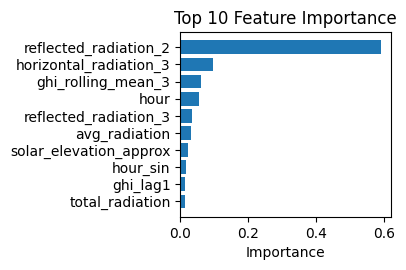

In [700]:
# Plot 4: Feature importance
plt.subplot(2, 2, 4)
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('solar_forecasting_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [701]:
import pkg_resources

# List the important libraries you used
used_packages = ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'xgboost', 'mlp', 'random forest']

with open("requirements.txt", "w") as f:
    for package in used_packages:
        try:
            version = pkg_resources.get_distribution(package).version
            f.write(f"{package}=={version}\n")
        except:
            pass  # skip if not installed